# **Лабораторна робота 4: Прогнозування даних системи Лоренца та об'єктів Нарендра-Пархтізаратхі за допомогою  моделей машинного навчання**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**

 Робота з даними, згенерованими системою Лоренца та об'єктами Нарендра-Пархтізаратхі, для передбачення майбутніх значеннь за допомогою  моделей машинного навчання.

#### **Система Лоренца:**

Система Лоренца описується трьома диференціальними рівняннями:

$$
\begin{cases}
\frac{dx}{dt} = \sigma (y - x) \\
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{cases}
$$

де:
- $( \sigma )$ — коефіцієнт Прандтля (зазвичай $ \sigma = 10 $),
- $( \rho )$ — числовий параметр для турбулентності (зазвичай $ \rho = 28 $),
- $( \beta )$ — коефіцієнт відношення висоти до довжини (зазвичай $ \beta = 8/3 $).

#### **Об'єкти Нарендра-Пархтізаратхі:**

Об'єкти Нарендра-Пархтізаратхі описуються наступними рівняннями:

$$
\begin{cases}
x_1(t+1) = \alpha_1 x_1(t) + \beta_1 x_2(t) + \gamma_1 x_3(t) + \delta_1 \\
x_2(t+1) = \alpha_2 x_1(t) + \beta_2 x_2(t) + \gamma_2 x_3(t) + \delta_2 \\
x_3(t+1) = \alpha_3 x_1(t) + \beta_3 x_2(t) + \gamma_3 x_3(t) + \delta_3
\end{cases}
$$

де $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$ — коефіцієнти для кожного з рівнянь.

#### **Завдання до лабораторної роботи:**

Завдання 1. *Генерація даних:*

   1.1 Згенеруйте дані для системи Лоренца з використанням зазначених параметрів. Виробіть не менше ніж 10 000 точок даних.

   1.2 Згенеруйте дані для об'єктів Нарендра-Пархтізаратхі, використовуючи різні значення коефіцієнтів $(\alpha_i)$, $(\beta_i)$, $(\gamma_i)$ і $(\delta_i)$. Виробіть не менше ніж 10 000 точок даних.

---
Завдання 2. *Підготовка даних:*
   
   2.1 Розділіть дані на навчальний, валідаційний і тестовий набори. Використовуйте 70% для навчання, 15% для валідації та 15% для тестування.
   
   2.2 Нормалізуйте дані за допомогою StandardScaler. Убедитесь, що всі дані масштабовані перед навчанням моделей.

---
Завдання 3. *Моделювання:*
   
   3.1 Застосуйте наступні моделі машинного навчання:
     
     - Лінійна регресія
     - Дерево рішень
     - Случайний ліс (Random Forest)
     - Метод опорних векторів (SVM)
   
   3.2 Для кожної моделі виконайте тренування на навчальному наборі даних.

---
Завдання 4. *Підбір гіперпараметрів:*
   
   4.1 Для кожної моделі використовуйте Grid Search для підбору оптимальних гіперпараметрів. Параметри для підбору:
     
     - Лінійна регресія: (не потребує підбору гіперпараметрів, але перевірте регуляризацію)
     - Дерево рішень: `max_depth`, `min_samples_split`, `min_samples_leaf`
     - Випадковий ліс: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`
     - SVM: `C`, `kernel`, `gamma`
---
Завдання 5. *Оцінка моделей:*
   
   5.1 Оцініть кожну модель на валідаційному наборі за допомогою середньої квадратичної помилки (MSE) та R².
  
   5.2 Виконайте фінальну оцінку на тестовому наборі даних.

---
Завдання 6. *Аналіз результатів:*
   
   6.1 Порівняйте результати всіх моделей. Створіть таблицю з метриками для кожної моделі.

   6.2 Візуалізуйте результати прогнозування для кожної моделі (наприклад, графіки реальних значень проти прогнозованих).

---
Завдання 7. *Документація та звіт:*
   
   7.1 Опишіть методику генерації даних, моделювання, підбору гіперпараметрів та оцінки моделей.
   
   7.2 Підготуйте звіт з результатами, включаючи таблиці, графіки та висновки про найкращу модель.

---
#### **Інструкції:**

1. **Генерація даних:**
   Використовуйте бібліотеки `numpy` та `scipy` для генерації даних.

2. **Навчання моделей:**
   Використовуйте `scikit-learn` для реалізації моделей і налаштування гіперпараметрів.

3. **Оцінка моделей:**
   Використовуйте функції `mean_squared_error`, `r2_score` з `sklearn.metrics` для оцінки.

4. **Візуалізація:**
   Для візуалізації використовуйте бібліотеки `matplotlib` та `seaborn`.

5. **Документація:**
   Оформіть звіт у форматі Jupyter Notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

initial_state = [1.0, 1.0, 1.0]
t_span = [0, 50]
t_eval = np.linspace(0, 50, 10000)

params = (10, 28, 2.667)

sol = solve_ivp(lorenz, t_span, initial_state, args=(params[0], params[1], params[2]), t_eval=t_eval)
trajectory = sol.y

lorenz_df = pd.DataFrame({
    'X': trajectory[0],
    'Y': trajectory[1],
    'Z': trajectory[2]
})
lorenz_df.to_csv('lorenz_trajectory.csv', index=False)

In [3]:
alpha = [0.5, -1.2, 0.8]
beta = [0.3, 0.4, -0.6]
gamma = [-0.2, 0.5, 1.2]
delta = [0.1, -0.3, 0.05]

state = [1.0, 1.0, 1.0]
n_points = 10000

x1_vals = []
x2_vals = []
x3_vals = []

for _ in range(n_points):
    x1, x2, x3 = state
    new_x1 = alpha[0] * x1 + beta[0] * x2 + gamma[0] * x3 + delta[0]
    new_x2 = alpha[1] * x1 + beta[1] * x2 + gamma[1] * x3 + delta[1]
    new_x3 = alpha[2] * x1 + beta[2] * x2 + gamma[2] * x3 + delta[2]

    x1_vals.append(new_x1)
    x2_vals.append(new_x2)
    x3_vals.append(new_x3)

    state = [new_x1, new_x2, new_x3]

narendra_df = pd.DataFrame({
    'X1': x1_vals,
    'X2': x2_vals,
    'X3': x3_vals
})

narendra_df.to_csv('narendra_objects.csv', index=False)

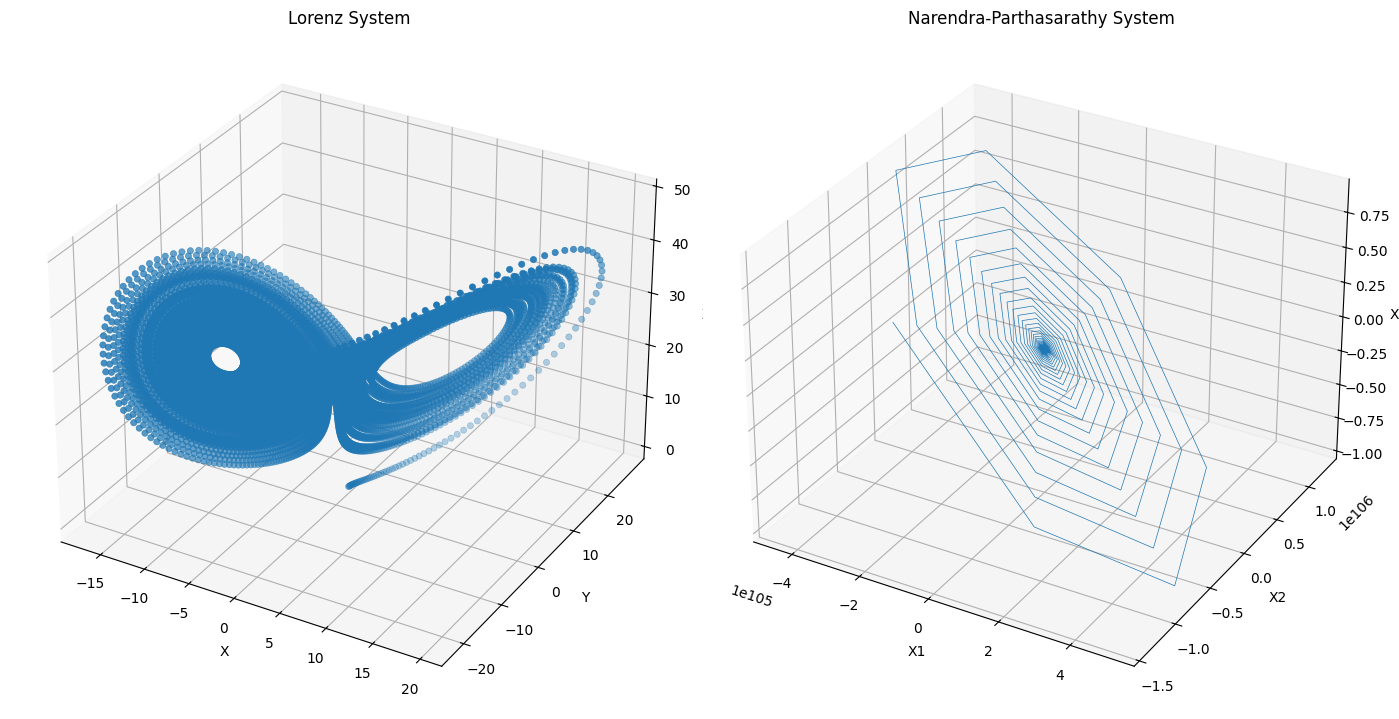

In [4]:
fig = plt.figure(figsize=(14, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(trajectory[0], trajectory[1], trajectory[2], lw=0.5)
ax1.set_title('Lorenz System')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x1_vals, x2_vals, x3_vals, lw=0.5)
ax2.set_title('Narendra-Parthasarathy System')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')

plt.tight_layout()
plt.show()


In [5]:
scaler = StandardScaler()

#lorenz
l_X = lorenz_df[['X', 'Y']]
l_y = lorenz_df['Z']

l_x_train, l_x_temp, l_y_train, l_y_temp = train_test_split(l_X, l_y, test_size=0.3, random_state=42)
l_x_valid, l_x_test, l_y_valid, l_y_test = train_test_split(l_x_temp, l_y_temp, test_size=0.5, random_state=42)

l_train_df = scaler.fit_transform(l_x_train)
l_valid_df = scaler.transform(l_x_valid)
l_test_df = scaler.transform(l_x_test)


#narendra
n_X = narendra_df[['X1', 'X2']]
n_y = narendra_df['X3']

n_x_train, n_x_temp, n_y_train, n_y_temp = train_test_split(n_X, n_y, test_size=0.3, random_state=42)
n_x_valid, n_x_test, n_y_valid, n_y_test = train_test_split(n_x_temp, n_y_temp, test_size=0.5, random_state=42)

n_train_df = scaler.fit_transform(n_x_train)
n_valid_df = scaler.transform(n_x_valid)
n_test_df = scaler.transform(n_x_test)

In [6]:
real_predicted_array = []

# **Lorenz Model Training**

In [7]:
#Linear Regression

linear_regression = LinearRegression()

linear_regression.fit(l_train_df, l_y_train)

y_prediction = linear_regression.predict(l_test_df)

l_mse_lr = mean_squared_error(l_y_test, y_prediction)
print(f'Linear Regression Mean Squared Error: {l_mse_lr:.2f}')
l_r2_lr = r2_score(l_y_test, y_prediction)
print(f'Linear Regression R2 Score: {l_r2_lr:.2f}')

real_predicted_array.append((l_y_test, y_prediction, "Lorenz Linear Regression"))

Linear Regression Mean Squared Error: 62.86
Linear Regression R2 Score: 0.02


In [8]:
#Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(l_train_df, l_y_train)

y_prediction = decision_tree.predict(l_test_df)

mse = mean_squared_error(l_y_test, y_prediction)
print(f'Decision Tree Mean Squared Error No Fine Tune: {mse:.2f}')

#-------------------------------------------------------------------------------------------------------------------------------

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_params = DecisionTreeRegressor()

grid_search_dt = GridSearchCV(estimator=decision_tree_params, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

grid_search_dt.fit(l_train_df, l_y_train)

print(f"Best Decision Tree Parameters: {grid_search_dt.best_params_}")

#-------------------------------------------------------------------------------------------------------------------------------
y_prediction = grid_search_dt.predict(l_test_df)

l_mse_dt = mean_squared_error(l_y_test, y_prediction)
print(f'Decision Tree Mean Squared Error With Fine Tune: {l_mse_dt:.2f}')
l_r2_dt = r2_score(l_y_test, y_prediction)
print(f'Decision Tree R2 Score With Fine Tune: {l_r2_dt:.2f}')

real_predicted_array.append((l_y_test, y_prediction, "Lorenz Decision Tree"))


Decision Tree Mean Squared Error No Fine Tune: 3.46
Best Decision Tree Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tree Mean Squared Error With Fine Tune: 3.15
Decision Tree R2 Score With Fine Tune: 0.95


In [9]:
#Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(l_train_df, l_y_train)

y_prediction = random_forest.predict(l_test_df)

mse = mean_squared_error(l_y_test, y_prediction)
print(f'Random Forest Mean Squared Error No Fine Tune: {mse:.2f}')

#-------------------------------------------------------------------------------------------------------------------------------

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_forest_params = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=random_forest_params, param_grid=param_grid_rf, cv=3, n_jobs=-1)

grid_search_rf.fit(l_train_df, l_y_train)

print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")

#-------------------------------------------------------------------------------------------------------------------------------

y_prediction = grid_search_rf.predict(l_test_df)

l_mse_rf = mean_squared_error(l_y_test, y_prediction)
print(f'Random Forest Mean Squared Error With Fine Tune: {l_mse_rf:.2f}')
l_r2_rf = r2_score(l_y_test, y_prediction)
print(f'Random Forest R2 Score With Fine Tune: {l_r2_rf:.2f}')

real_predicted_array.append((l_y_test, y_prediction, "Lorenz Random Forest"))


Random Forest Mean Squared Error No Fine Tune: 2.15
Best Random Forest Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Mean Squared Error With Fine Tune: 2.11
Random Forest R2 Score With Fine Tune: 0.97


In [10]:
#SVM
svm = SVR(kernel='rbf')
svm.fit(l_train_df, l_y_train)

y_prediction = svm.predict(l_test_df)

mse = mean_squared_error(l_y_test, y_prediction)
print(f'SVM Mean Squared Error No Fine Tune: {mse:.2f}')

#-------------------------------------------------------------------------------------------------------------------------------

param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svr_model = SVR()

grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=3, n_jobs=-1)

grid_search_svr.fit(l_train_df, l_y_train)

print(f"Best SVM Parameters: {grid_search_svr.best_params_}")

#-------------------------------------------------------------------------------------------------------------------------------

y_prediction = grid_search_svr.predict(l_test_df)

l_mse_svm = mean_squared_error(l_y_test, y_prediction)
print(f'SVM Mean Squared Error With Fine Tune: {l_mse_svm:.2f}')
l_r2_svm = r2_score(l_y_test, y_prediction)
print(f'SVM R2 Score With Fine Tune: {l_r2_svm:.2f}')

real_predicted_array.append((l_y_test, y_prediction, "Lorenz SVM"))


SVM Mean Squared Error No Fine Tune: 8.15
Best SVM Parameters: {'C': 10, 'gamma': 'scale'}
SVM Mean Squared Error With Fine Tune: 7.17
SVM R2 Score With Fine Tune: 0.89


In [11]:
#Lorenz Validation
y_valid_pred_lr = linear_regression.predict(l_valid_df)
y_valid_pred_dt = grid_search_dt.predict(l_valid_df)
y_valid_pred_rf = grid_search_rf.predict(l_valid_df)
y_valid_pred_svm = grid_search_svr.predict(l_valid_df)

l_mse_valid_lr = mean_squared_error(l_y_valid, y_valid_pred_lr)
l_r2_valid_lr = r2_score(l_y_valid, y_valid_pred_lr)

l_mse_valid_dt = mean_squared_error(l_y_valid, y_valid_pred_dt)
l_r2_valid_dt = r2_score(l_y_valid, y_valid_pred_dt)

l_mse_valid_rf = mean_squared_error(l_y_valid, y_valid_pred_rf)
l_r2_valid_rf = r2_score(l_y_valid, y_valid_pred_rf)

l_mse_valid_svm = mean_squared_error(l_y_valid, y_valid_pred_svm)
l_r2_valid_svm = r2_score(l_y_valid, y_valid_pred_svm)

print(f"Linear Regression - MSE (Validation): {l_mse_valid_lr:.2f}, R² (Validation): {l_r2_valid_lr:.2f}")
print(f"Decision Tree - MSE (Validation): {l_mse_valid_dt:.2f}, R² (Validation): {l_r2_valid_dt:.2f}")
print(f"Random Forest - MSE (Validation): {l_mse_valid_rf:.2f}, R² (Validation): {l_r2_valid_rf:.2f}")
print(f"SVM - MSE (Validation): {l_mse_valid_svm:.2f}, R² (Validation): {l_r2_valid_svm:.2f}")

Linear Regression - MSE (Validation): 65.02, R² (Validation): 0.01
Decision Tree - MSE (Validation): 3.44, R² (Validation): 0.95
Random Forest - MSE (Validation): 2.01, R² (Validation): 0.97
SVM - MSE (Validation): 8.35, R² (Validation): 0.87


# **Narendra Model Training**

In [12]:
#Linear Regression

linear_regression = LinearRegression()

linear_regression.fit(n_train_df, n_y_train)

y_prediction = linear_regression.predict(n_test_df)

n_mse_lr = mean_squared_error(n_y_test, y_prediction)
print(f'Linear Regression Mean Squared Error: {n_mse_lr:.2f}')
n_r2_lr = r2_score(n_y_test, y_prediction)
print(f'Linear Regression R2 Score: {n_r2_lr:.2f}')

real_predicted_array.append((n_y_test, y_prediction, "Narendra Linear Regression"))

Linear Regression Mean Squared Error: 11996411212923739094678962571451487066519862372980700841199254229145459786396444628315244258251063880485703790401117870516985124980151517326303664077818226008062903522652492753010688.00
Linear Regression R2 Score: 1.00


In [13]:
#Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(n_train_df, n_y_train)

y_prediction = decision_tree.predict(n_test_df)

mse = mean_squared_error(n_y_test, y_prediction)
print(f'Decision Tree Mean Squared Error No Fine Tune: {mse:.2f}')

#-------------------------------------------------------------------------------------------------------------------------------

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_params = DecisionTreeRegressor()

grid_search_dt = GridSearchCV(estimator=decision_tree_params, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error')

grid_search_dt.fit(n_train_df, n_y_train)

print(f"Best Decision Tree Parameters: {grid_search_dt.best_params_}")

#-------------------------------------------------------------------------------------------------------------------------------

y_prediction = grid_search_dt.predict(n_test_df)

n_mse_dt = mean_squared_error(n_y_test, y_prediction)
print(f'Decision Tree Mean Squared Error With Fine Tune: {n_mse_dt:.2f}')
n_r2_dt = r2_score(n_y_test, y_prediction)
print(f'Decision Tree R2 Score With Fine Tune: {n_r2_dt:.2f}')

real_predicted_array.append((n_y_test, y_prediction, "Narendra Decision Tree"))


Decision Tree Mean Squared Error No Fine Tune: 5769763448734818061211146720716108734569551396646302578011801338537886615866382632888034898557376525934515296642714052514368480913271948835869569029444372300942738106274416197410310390807692344258181667487744.00
Best Decision Tree Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Mean Squared Error With Fine Tune: 10273050280599252590427156445891487487355967060656318406332737695124928779665083982192738184904623116572015267111781421982959063153388471409704539406973882537567167948784896934611680283603964950604073542877184.00
Decision Tree R2 Score With Fine Tune: 0.93


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:990: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


In [14]:
#Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(n_train_df, n_y_train)

y_prediction = random_forest.predict(n_test_df)

mse = mean_squared_error(n_y_test, y_prediction)
print(f'Random Forest Mean Squared Error No Fine Tune: {mse:.2f}')

#-------------------------------------------------------------------------------------------------------------------------------

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 25],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_forest_params = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=random_forest_params, param_grid=param_grid_rf, cv=3, n_jobs=-1)

grid_search_rf.fit(n_train_df, n_y_train)

print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")

#-------------------------------------------------------------------------------------------------------------------------------

y_prediction = grid_search_rf.predict(n_test_df)

n_mse_rf = mean_squared_error(n_y_test, y_prediction)
print(f'Random Forest Mean Squared Error With Fine Tune: {n_mse_rf:.2f}')
n_r2_rf = r2_score(n_y_test, y_prediction)
print(f'Random Forest R2 Score With Fine Tune: {n_r2_rf:.2f}')

real_predicted_array.append((n_y_test, y_prediction, "Narendra Random Forest"))

Random Forest Mean Squared Error No Fine Tune: 6646111405869757270414694885146245153710805180547851960604107959179264529622742180016053138894448483483420025706956780647286566922647390125799618892542934235690829782518191416434509404640567064728248814403584.00
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Mean Squared Error With Fine Tune: 6623933161077196101661616831912139227474559362678800268190001258047094386506548894249077213843997438261778552077000411807951614208482470153205133066894545100346284031265473580089861455872029713636158154473472.00
Random Forest R2 Score With Fine Tune: 0.95


In [15]:
#SVM
svm = SVR(kernel='rbf')
svm.fit(n_train_df, n_y_train)

y_prediction = svm.predict(n_test_df)

mse = mean_squared_error(n_y_test, y_prediction)
print(f'SVM Mean Squared Error No Fine Tune: {mse:.2f}')

#-------------------------------------------------------------------------------------------------------------------------------

param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

svr_model = SVR()

grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=3, n_jobs=-1)

grid_search_svr.fit(n_train_df, n_y_train)

print(f"Best SVM Parameters: {grid_search_svr.best_params_}")

#-------------------------------------------------------------------------------------------------------------------------------

y_prediction = grid_search_svr.predict(n_test_df)

n_mse_svm = mean_squared_error(n_y_test, y_prediction)
print(f'SVM Mean Squared Error With Fine Tune: {n_mse_svm:.2f}')
n_r2_svm = r2_score(n_y_test, y_prediction)
print(f'SVM R2 Score With Fine Tune: {n_r2_svm:.2f}')

real_predicted_array.append((n_y_test, y_prediction, "Narendra SVM"))

SVM Mean Squared Error No Fine Tune: 146168508980977387102312687309823348331634438346388188298092680074718282699399327805782485445700000810981695069686231471833399310695061936308528462815705229834425996364887826697648000336205664878281518424784896.00
Best SVM Parameters: {'C': 0.1, 'gamma': 'scale'}
SVM Mean Squared Error With Fine Tune: 146168508980977387102312687309823348331634438346388188298092680074718282699399327805782485445700000810981695069686231471833399310695061936308528462815705229834425996364887826697648000336205664878281518424784896.00
SVM R2 Score With Fine Tune: -0.00


In [16]:
#Narendra Validation
y_valid_pred_lr = linear_regression.predict(n_valid_df)
y_valid_pred_dt = grid_search_dt.predict(n_valid_df)
y_valid_pred_rf = grid_search_rf.predict(n_valid_df)
y_valid_pred_svm = grid_search_svr.predict(n_valid_df)

n_mse_valid_lr = mean_squared_error(n_y_valid, y_valid_pred_lr)
n_r2_valid_lr = r2_score(n_y_valid, y_valid_pred_lr)

n_mse_valid_dt = mean_squared_error(n_y_valid, y_valid_pred_dt)
n_r2_valid_dt = r2_score(n_y_valid, y_valid_pred_dt)

n_mse_valid_rf = mean_squared_error(n_y_valid, y_valid_pred_rf)
n_r2_valid_rf = r2_score(n_y_valid, y_valid_pred_rf)

n_mse_valid_svm = mean_squared_error(n_y_valid, y_valid_pred_svm)
n_r2_valid_svm = r2_score(n_y_valid, y_valid_pred_svm)

print(f"Linear Regression - MSE (Validation): {n_mse_valid_lr:.2f}, R² (Validation): {n_r2_valid_lr:.2f}")
print(f"Decision Tree - MSE (Validation): {n_mse_valid_dt:.2f}, R² (Validation): {n_r2_valid_dt:.2f}")
print(f"Random Forest - MSE (Validation): {n_mse_valid_rf:.2f}, R² (Validation): {n_r2_valid_rf:.2f}")
print(f"SVM - MSE (Validation): {n_mse_valid_svm:.2f}, R² (Validation): {n_r2_valid_svm:.2f}")

Linear Regression - MSE (Validation): 5671183079173159897350508663728354592473707779177167146880043161676178021995616073744293686410101800659393599181761217576206156955532281034417865245225540366697976058643676248670208.00, R² (Validation): 1.00
Decision Tree - MSE (Validation): 2426462427992606151055869912029513265343337598309362085055115599583761042688314958429025171653045197930669071767888195732858144684561347717925015531590078533692280686462484674676688755662740503490959257894912.00, R² (Validation): 0.97
Random Forest - MSE (Validation): 1317068559251940892939216906164275211104492459443730519971309458575470411866266782328094444614066360720557310331886051223629874313864676501423874246353090801238327903428200250498923347864547050323185946853376.00, R² (Validation): 0.98
SVM - MSE (Validation): 715320008018987758016319919298255961301803709655275258684201001478056543988671777131872617251057189352912871037983920108197995954903006752322725019213696070835490340911739261090401241877354138

In [17]:
results = pd.DataFrame({
    'Model': ['Lorenz - Linear Regression', 'Lorenz - Decision Tree', 'Lorenz - Random Forest', 'Lorenz - SVM',
              'Narendra - Linear Regression', 'Narendra - Decision Tree', 'Narendra - Random Forest', 'Narendra - SVM'],
    'MSE (Validation)': [l_mse_valid_lr, l_mse_valid_dt, l_mse_valid_rf, l_mse_valid_svm, 
                         n_mse_valid_lr, n_mse_valid_dt, n_mse_valid_rf, n_mse_valid_svm],
    'R² (Validation)': [l_r2_valid_lr, l_r2_valid_dt, l_r2_valid_rf, l_r2_valid_svm,
                        n_r2_valid_lr, n_r2_valid_dt, n_r2_valid_rf, n_r2_valid_svm],
    'MSE (Test)': [l_mse_lr, l_mse_dt, l_mse_rf, l_mse_svm,
                   n_mse_lr, n_mse_dt, n_mse_rf, n_mse_svm],
    'R² (Test)': [l_r2_lr, l_r2_dt, l_r2_rf, l_r2_svm,
                  n_r2_lr, n_r2_dt, n_r2_rf, n_r2_svm]
})

results.to_csv("results.csv", index=False)
print(results)

                          Model  MSE (Validation)  R² (Validation)  \
0    Lorenz - Linear Regression      6.502404e+01         0.012196   
1        Lorenz - Decision Tree      3.437949e+00         0.947773   
2        Lorenz - Random Forest      2.006958e+00         0.969512   
3                  Lorenz - SVM      8.349248e+00         0.873163   
4  Narendra - Linear Regression     5.671183e+180         1.000000   
5      Narendra - Decision Tree     2.426462e+207         0.966068   
6      Narendra - Random Forest     1.317069e+207         0.981582   
7                Narendra - SVM     7.153200e+208        -0.000308   

      MSE (Test)  R² (Test)  
0   6.286402e+01   0.018841  
1   3.146462e+00   0.950891  
2   2.109256e+00   0.967079  
3   7.172613e+00   0.888052  
4  1.199641e+181   1.000000  
5  1.027305e+208   0.929708  
6  6.623933e+207   0.954677  
7  1.461685e+209  -0.000133  


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


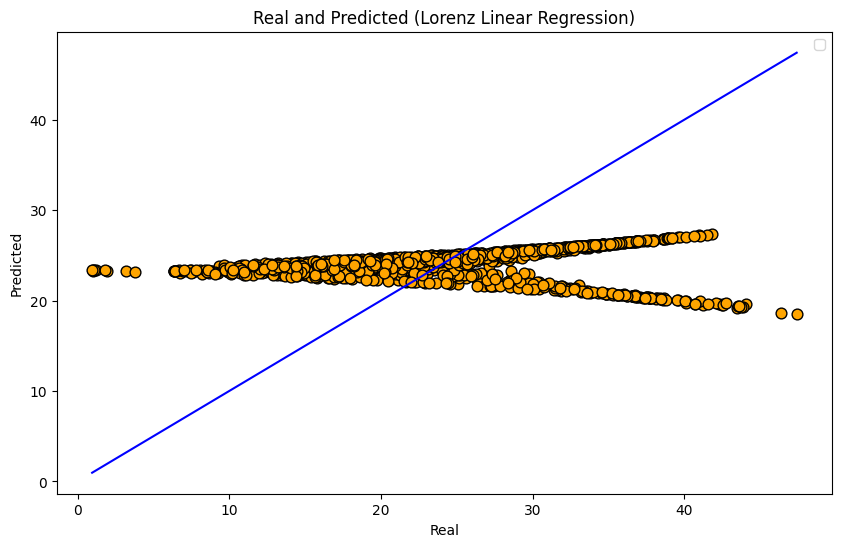

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


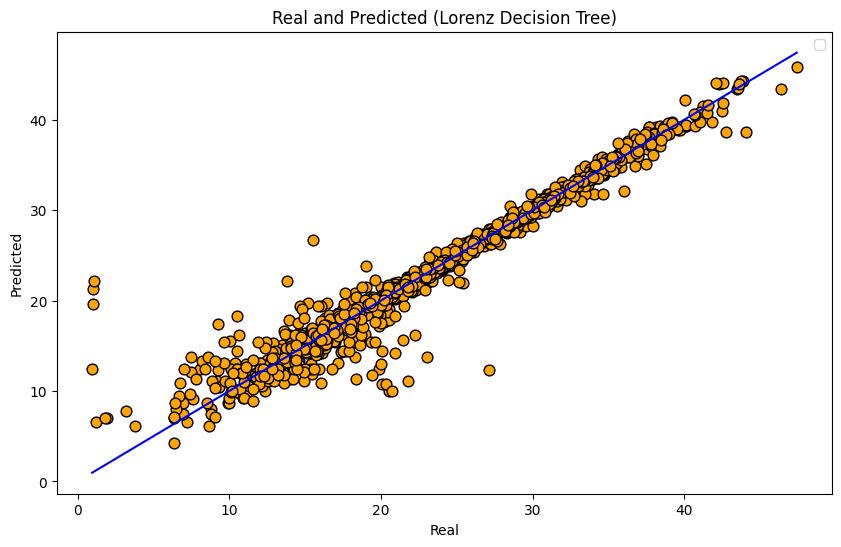

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


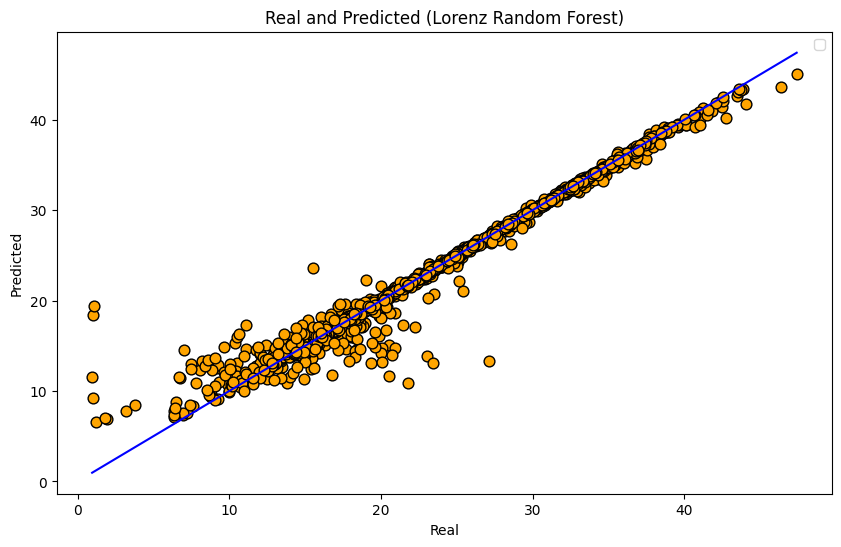

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


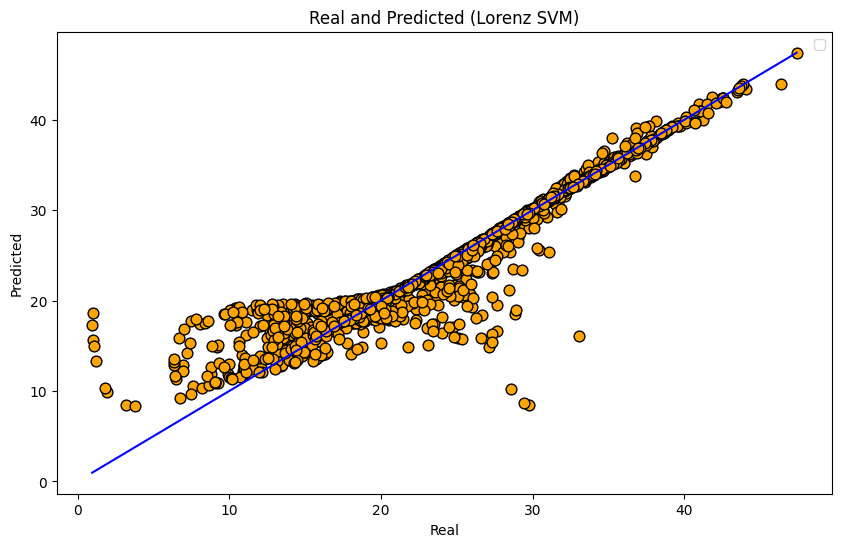

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


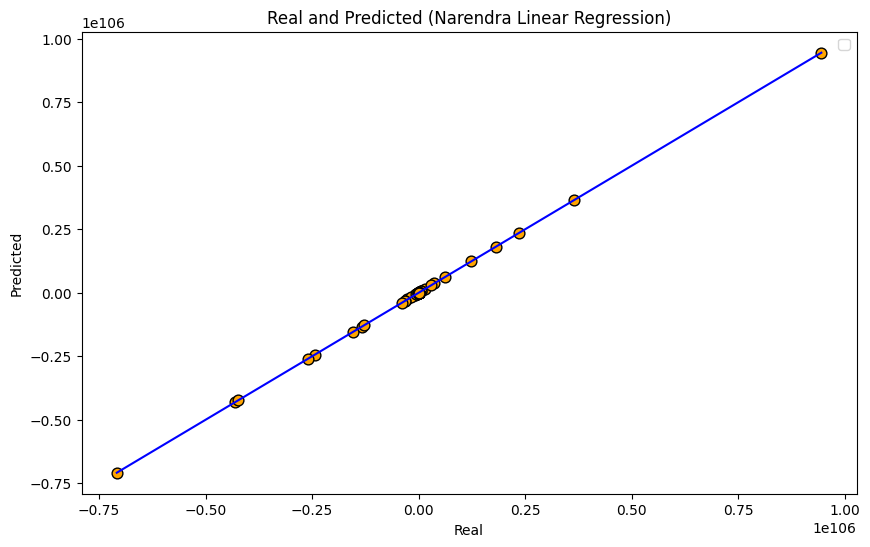

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


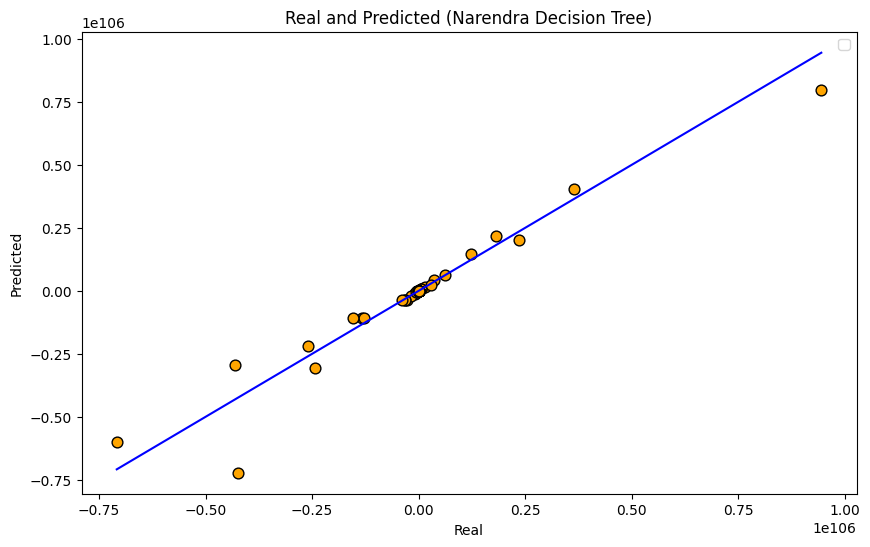

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


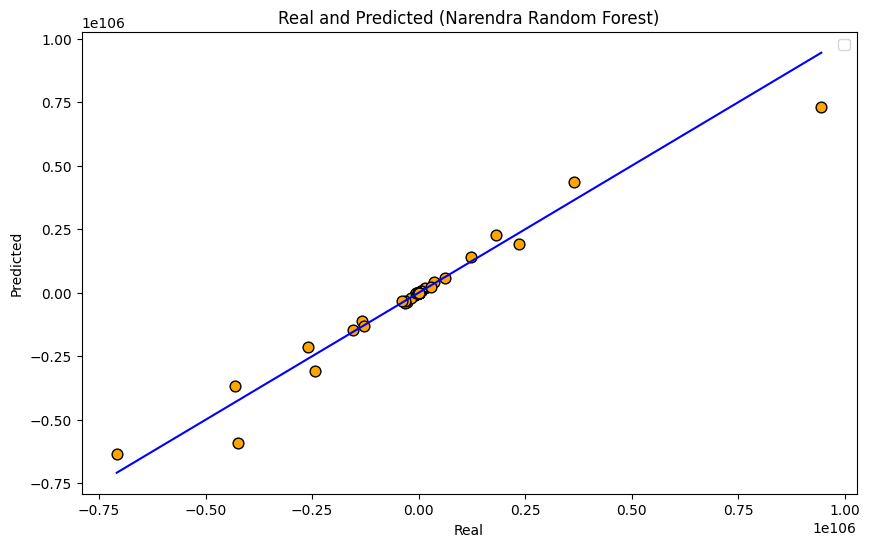

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


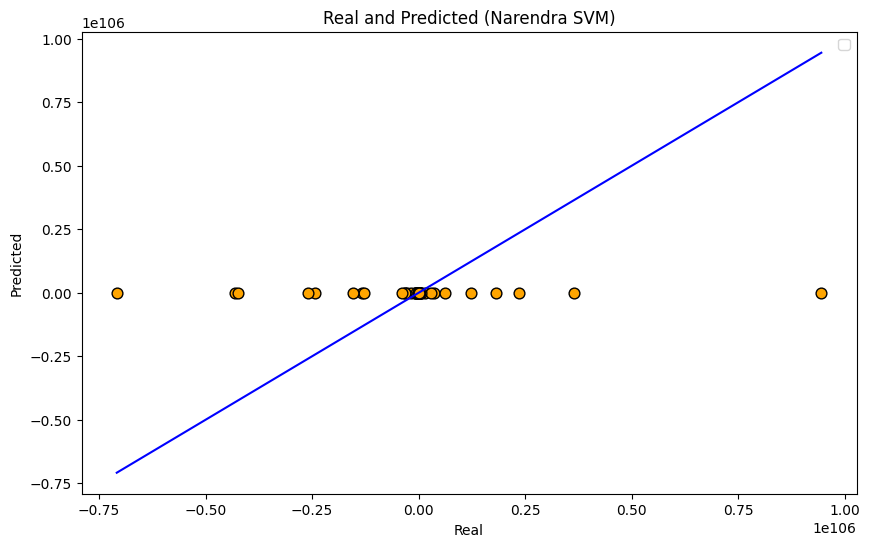

In [18]:
def plot_predictions(real, predicted, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(real, predicted, edgecolors='k', c='orange', s=60)
    plt.plot([min(real), max(real)], [min(real), max(real)], color='blue')
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.title(f'Real and Predicted ({model_name})')
    plt.legend()
    plt.show()

for (real, predicted, model_name) in real_predicted_array:
    plot_predictions(real, predicted, model_name)


Самого початку ми згенерували штучні дані для системи Лоренза та Нарендра Партхізаратхі, по 10 000 точок в кожному датасеті. \
Ми використовували **метод Чисельного інтегрування**. \
Потім, ми поділили дані на тренувальні та тестові в співвідношені 70% на 30%. І додатково поділили тестові дані на валідаційні та тестові на половину. Після поділення, ми нормалізували їх. 

Далі, я почав тренувати моделі до кожного датасету по черзі. В моєму арсеналі були 4 моделі: **Linear Regression, Decision Tree, Random Forest та SVM**. Під кожну модель, окрім лінійної регресії, я підібрав найоптимальніші гіперпараметри за допомогою **GridSearch**. Та для визначення якості моделі, я буду використовувати такі метрики як: **Mean Squared Error та R^2 Score**. Спочатку, я надав для перебору доволі багато параметрів (матрицю 4х4), і не зміг отримати результат навіть після години роботи. Потім, я зменшив їх до вигляду, який є зараз і воно познаходило найоптимальніші параметри для кожної моделі відповідно.

Спершу, Лінійна Регресія надала не дуже втішний результат, як і очікувалось від Лінійної моделі на таких даних. Наступні моделі я порівнював, як впливає **Fine Tune гіперпараметрами** на модель. \
Модель Дерево Рішень після тренування дало нам доволі хороший результат MSE: 3.5. Та після покращення моделі параметрами, результат став краще майже на 0.5. \
Наступна Модель це Ансамбль дерев рішень, а саме Random Forest. Там, в порівнянні з Деревом рішень результат трішки краще, і різниця між Fine tune та чистою моделлю дуже маленька. Ця модель надала найкращий результат зі всіх. \
І останньою була модель SVM, Яка показала результат в MSE: 8, що є не поганим але не дотягує до Random Forest, також після підбору гіперпараметрів, вона покращилась на 1 поінт. 

Нижче, я вивів табличку з результатами за цими моделям, після проведення валідації.

In [5]:
results_df = pd.read_csv("results.csv")
results_df.head(4)

,Model,MSE (Validation),R² (Validation),MSE (Test),R² (Test)
0,Lorenz - Linear Regression,65.024041,0.012196,62.864023,0.018841
1,Lorenz - Decision Tree,3.437949,0.947773,3.146462,0.950891
2,Lorenz - Random Forest,2.006958,0.969512,2.109256,0.967079
3,Lorenz - SVM,8.349248,0.873163,7.172613,0.888052


Тестові дані, в порівнянні з валідаційними трішки покращились. Можливо, потрібно було використати більше різних параметрів в Search, але брати не GridSearch, а RandomSearch?

## **Додаткова умова до лабораторної роботи 5:**

*Для того, щоб отримати оцінку більше 50 балів, Вам необхідно використати якесь з цих рівнянь. Вибір рівняння вібдувається відповідно до Вашого номеру в журналі групи.*


**Об'єкти Нарендра-Партхізаратхі (Narendra-Parthasarathy)** — це нелінійні системи управління, які часто використовуються для тестування адаптивних і нелінійних регуляторів. Їх поведінка моделюється нелінійними диференціальними рівняннями, що описують динаміку в часі. Ці рівняння створюють цікаву, нелінійну та хаотичну поведінку системи.

### **Нелінійних рівнянь Нарендра-Партхізаратхі:**

1. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \sin(x_1)
$$

2. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = a_2 x_1 x_2 - b_2 \cos(x_1)
$$

3. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2
$$

4. $$
\dot{x}_1 = a_1 x_1 - b_1 x_2 \sin(x_1)
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \cos(x_1)
$$

5. $$
\dot{x}_1 = -a_1 x_1 + b_1 x_2^2 \cos(x_1)
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_1 x_2
$$

6. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 x_1^3
$$
$$
\dot{x}_2 = a_2 \sin(x_1) - b_2 x_2^2
$$

7. $$
\dot{x}_1 = -a_1 x_1^2 + b_1 \cos(x_2)
$$
$$
\dot{x}_2 = a_2 x_1 - b_2 \sin(x_2)
$$

8. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 x_1 \cos(x_2)
$$

9. $$
\dot{x}_1 = a_1 x_1^2 - b_1 x_2^2
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 \sin(x_2)
$$

10. $$
\dot{x}_1 = -a_1 x_1 \sin(x_2) + b_1 x_2^3
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_1 x_2
$$

11. $$
\dot{x}_1 = a_1 \sin(x_1 x_2) - b_1 x_1
$$
$$
\dot{x}_2 = -a_2 x_2^2 + b_2 \cos(x_1)
$$

12. $$
\dot{x}_1 = -a_1 x_1 + b_1 \sin(x_2^2)
$$
$$
\dot{x}_2 = a_2 x_1^2 - b_2 \cos(x_1)
$$

13. $$
\dot{x}_1 = a_1 x_1 x_2 - b_1 \sin(x_1^2)
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \cos(x_1 x_2)
$$

14. $$
\dot{x}_1 = a_1 x_1 - b_1 x_2^2 \sin(x_1)
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_1^3
$$

15. $$
\dot{x}_1 = a_1 \cos(x_2) - b_1 x_1^2 \sin(x_1)
$$
$$
\dot{x}_2 = -a_2 x_1 x_2 + b_2 \cos(x_1^2)
$$

16. $$
\dot{x}_1 = -a_1 \sin(x_1) + b_1 x_2^2
$$
$$
\dot{x}_2 = a_2 \sin(x_1 x_2) - b_2 \cos(x_1)
$$

17. $$
\dot{x}_1 = a_1 x_1^2 \cos(x_2) - b_1 x_1 x_2
$$
$$
\dot{x}_2 = -a_2 x_2 + b_2 \sin(x_1^2)
$$

18. $$
\dot{x}_1 = -a_1 x_1 \sin(x_2) + b_1 \cos(x_1^2)
$$
$$
\dot{x}_2 = a_2 x_1^2 - b_2 \cos(x_1 x_2)
$$

19. $$
\dot{x}_1 = a_1 \sin(x_2) - b_1 x_1^2
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 x_2^2
$$

20. $$
\dot{x}_1 = -a_1 x_1^2 + b_1 \sin(x_1 x_2)
$$
$$
\dot{x}_2 = a_2 \cos(x_1) - b_2 \sin(x_2^2)
$$

### Параметри:
- $( a_1, a_2 )$, $( b_1, b_2 )$ — це коефіцієнти, які можуть бути варійовані для дослідження динаміки системи та впливу на прогнозування.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [20]:
#code

In [21]:
#code

In [22]:
#code

In [23]:
#code

In [24]:
#code

In [25]:
#code